<a href="https://colab.research.google.com/github/cientistanomade/data_science/blob/cientistanomade-patch-1/Analise_dos_pacientes_que_desenvolveram_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados dos pacientes que desenvolveram diabetes**


Temos em mãos um arquivo com dados de pacientes que desenvolveram ou não diabetes para fins de análise a pedido do PO (Product Owner)

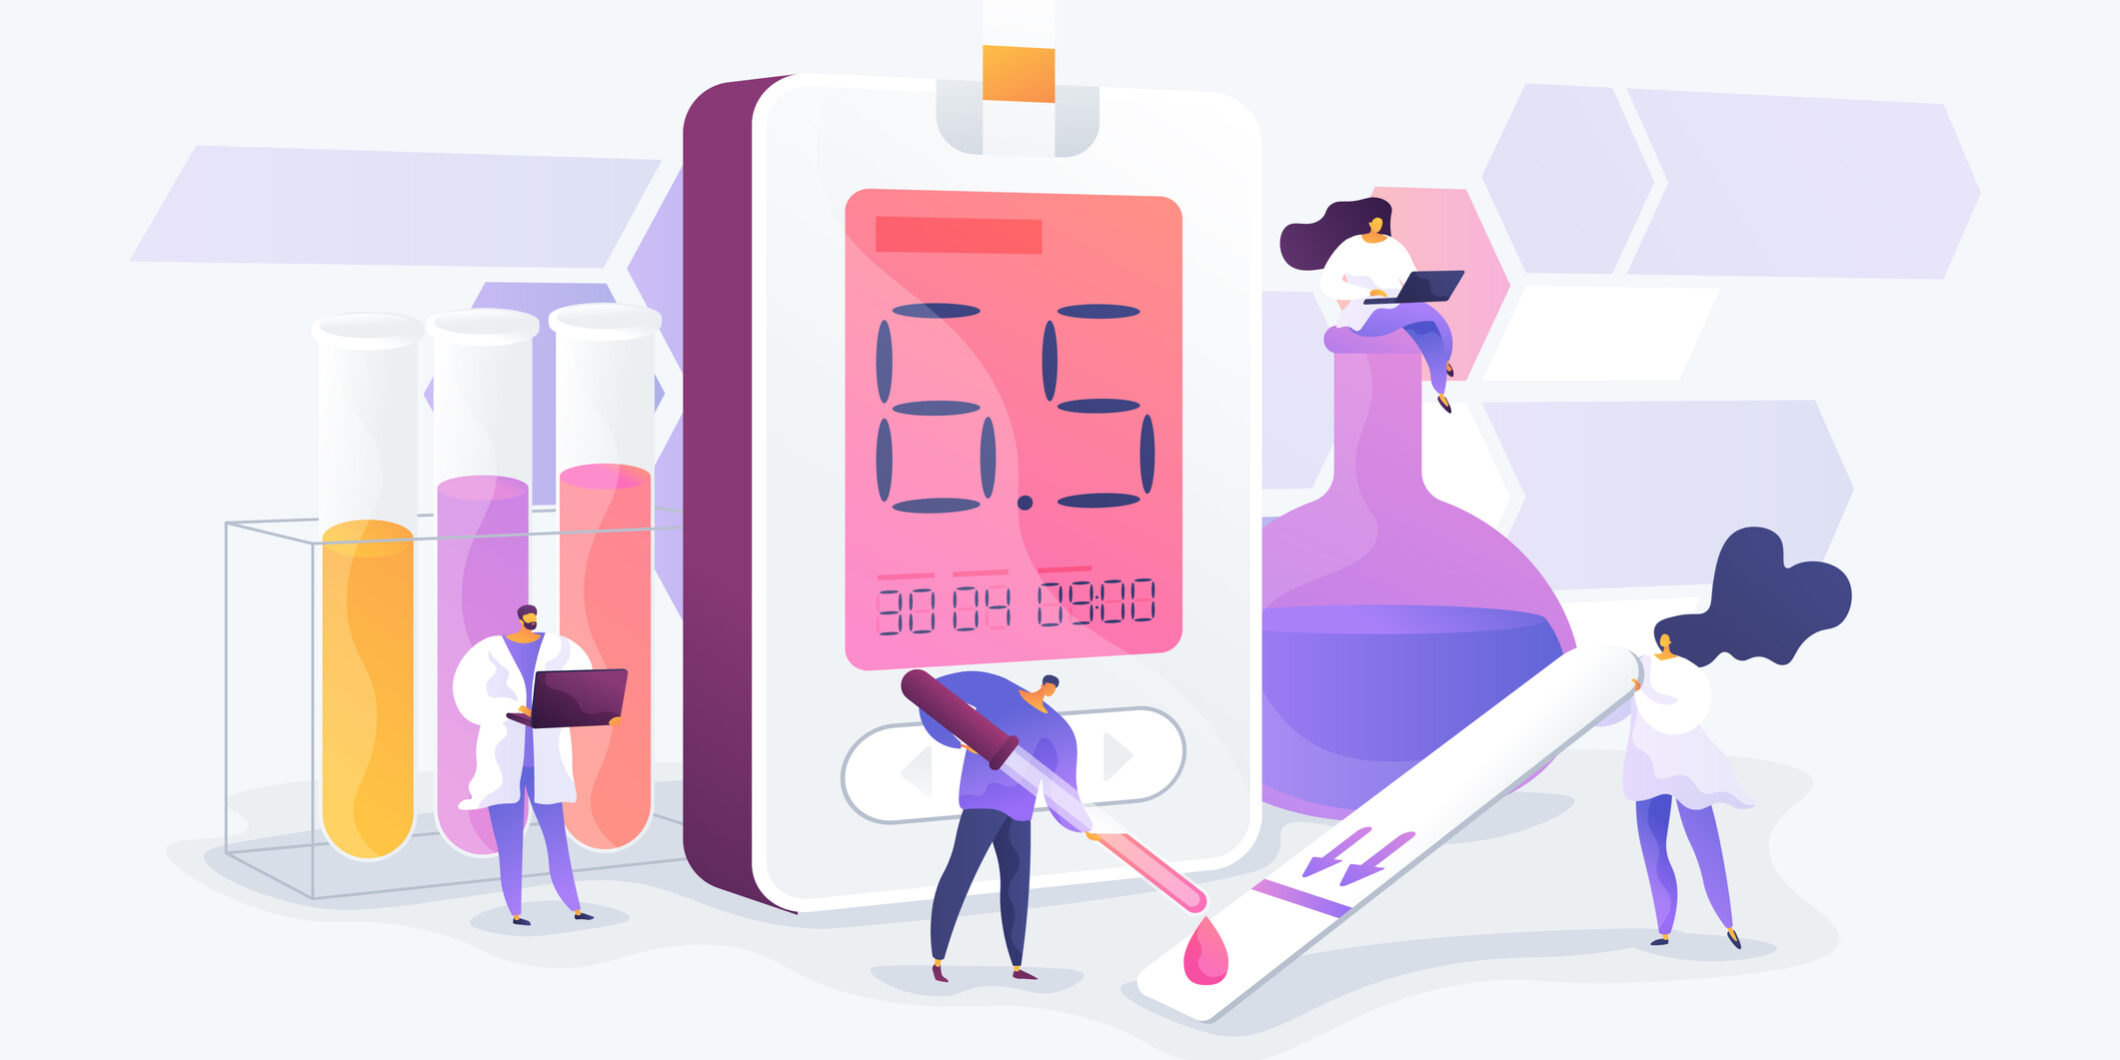


### **Objetivo**

Criar uma tabela no banco de dados [SQLite](https://www.sqlite.org/index.html) com todos os dados dos pacientes com mais de 50 anos e sinalizar através de uma coluna se o mesmo está normal (índice de massa corpórea manor que 30) e por fim gerar um arquivo CSV para encaminhar ao time de  Ciência de Dados.



### **Fonte de dados**

Todos os dados utilizados aqui foram obtidos a partir do link abaixo

https://www.kaggle.com/uciml/pima-indians-diabetes-database 

## Carregando os Pacotes

In [1]:
# Imports.
import pandas as pd
import sqlite3

## Carregando o dataset

In [2]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/diabetes.csv')

## Analise Exploratória

In [6]:
# Verificações iniciais.
print("Registros:\t {}".format(dados.shape[0]))
print("Variáveis:\t {}\n".format(dados.shape[1]))
display(dados.dtypes)

Registros:	 768
Variáveis:	 9



Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
# Visualizando uma amostra dos dados.
dados.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Criando uma conexão com o banco de dados SQLite.
con = sqlite3.connect('dbdiabetes.db')

In [10]:
# Criando comando mágico.
%load_ext sql

In [11]:
# Definindo o banco de dados.
%sql sqlite:////content/dbdiabetes.db

'Connected: @/content/dbdiabetes.db'

In [21]:
# Copiando os dados do dataframe para uma tabela no banco de dados.
dados.to_sql('DIABETES',con)

In [22]:
# Contabilizando os registros.
%%sql

SELECT COUNT(8) FROM DIABETES

 * sqlite:////content/dbdiabetes.db
Done.


COUNT(8)
768


In [24]:
# Extraindo uma amostra dos dados.
%%sql

SELECT * FROM DIABETES LIMIT 10;

 * sqlite:////content/dbdiabetes.db
Done.


index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [28]:
# Criando a entidade PACIENTES no banco de dados.
%%sql

CREATE TABLE PACIENTES (
                        Pregnancies INT,
                        Glucose INT,
                        BloodPressure INT,
                        SkinThickness INT,
                        Insulin INT,
                        BMI DECIMAL(8, 2),
                        DiabetesPedigreeFunction DECIMAL(8, 2),
                        Age INT,
                        Outcome INT
                        );

 * sqlite:////content/dbdiabetes.db
Done.


[]

In [29]:
%%sql

SELECT * FROM PACIENTES

 * sqlite:////content/dbdiabetes.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [30]:
# Inserindo os registros dos pacientes que possuem idade maior que 50.
%%sql

INSERT INTO PACIENTES(
                      Pregnancies, 
                      Glucose, 
                      BloodPressure, 
                      SkinThickness, 
                      Insulin, 
                      BMI, 
                      DiabetesPedigreeFunction, 
                      Age, 
                      Outcome
                      )
SELECT 
       Pregnancies, 
       Glucose, 
       BloodPressure, 
       SkinThickness, 
       Insulin, 
       BMI, 
       DiabetesPedigreeFunction, 
       Age, 
       Outcome 
FROM DIABETES
WHERE Age > 50;

 * sqlite:////content/dbdiabetes.db
81 rows affected.


[]

In [31]:
%%sql

SELECT * FROM PACIENTES LIMIT 7

 * sqlite:////content/dbdiabetes.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0,0.232,54,1
10,139,80,0,0,27.1,1.441,57,0
1,189,60,23,846,30.1,0.398,59,1
5,166,72,19,175,25.8,0.587,51,1
11,143,94,33,146,36.6,0.254,51,1
13,145,82,19,110,22.2,0.245,57,0


In [32]:
# Adicionando a coluna Perfil.
%%sql

ALTER TABLE PACIENTES
ADD Perfil VARCHAR(10);

 * sqlite:////content/dbdiabetes.db
Done.


[]

In [34]:
%%sql

SELECT * FROM PACIENTES LIMIT 7

 * sqlite:////content/dbdiabetes.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Perfil
2,197,70,45,543,30.5,0.158,53,1,None
8,125,96,0,0,0,0.232,54,1,None
10,139,80,0,0,27.1,1.441,57,0,None
1,189,60,23,846,30.1,0.398,59,1,None
5,166,72,19,175,25.8,0.587,51,1,None
11,143,94,33,146,36.6,0.254,51,1,None
13,145,82,19,110,22.2,0.245,57,0,None


In [35]:
# Atualizando o valor da coluna Perfil.
%%sql

UPDATE PACIENTES
SET Perfil = 'Normal'
WHERE BMI < 30;

 * sqlite:////content/dbdiabetes.db
38 rows affected.


[]

In [36]:
%%sql

SELECT * FROM PACIENTES LIMIT 7

 * sqlite:////content/dbdiabetes.db
Done.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Perfil
2,197,70,45,543,30.5,0.158,53,1,None
8,125,96,0,0,0,0.232,54,1,Normal
10,139,80,0,0,27.1,1.441,57,0,Normal
1,189,60,23,846,30.1,0.398,59,1,None
5,166,72,19,175,25.8,0.587,51,1,Normal
11,143,94,33,146,36.6,0.254,51,1,None
13,145,82,19,110,22.2,0.245,57,0,Normal


In [15]:
# Executando a isntrução SELECT...
query = con.execute('SELECT * FROM PACIENTES')

In [17]:
# Recuperando as colunas da entidade PACIENTES.
cols = [coluna[0] for coluna in query.description]

In [18]:
# Copiando os dados do banco de dados para o dataframe df.
df = pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

In [19]:
print("Registros:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
display(df.dtypes)

Registros:	 768
Variáveis:	 10



index                         int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [37]:
df.head(6)

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
5,5,5,116,74,0,0,25.6,0.201,30,0


In [20]:
# Gerando um arquivo CSV
df.to_csv('analise_diabetes.csv', index=False)

# **FIM**